<a href="https://colab.research.google.com/github/CristianoCoelhoSilva/Python/blob/master/Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib
import pydotplus
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Script

In [8]:
#Arquivo completo
df = pd.read_csv(r"https://raw.githubusercontent.com/CristianoCoelhoSilva/Python/master/Python/covid.csv")

df.drop(["ENTUBADO"], axis="columns", inplace=True)

Random under-sampling:
1    651
0    651
Name: INTERNADO, dtype: int64


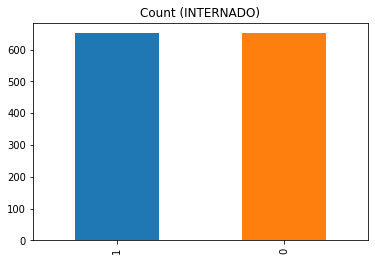

In [18]:
count_class_0, count_class_1 = df.INTERNADO.value_counts()# Divide by class
df_class_0 = df[df['INTERNADO'] == 0]
df_class_1 = df[df['INTERNADO'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_test_under.INTERNADO.value_counts())

df_test_under.INTERNADO.value_counts().plot(kind='bar', title='Count (INTERNADO)',color = ['#1F77B4', '#FF7F0E']);

In [31]:
labels = df_test_under.columns[2:]

df_test_under

X = df_test_under[labels]
y = df_test_under['INTERNADO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle =True)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron

pipeline_estendido = Pipeline([
    ("pre_process", make_column_transformer(
                              (Pipeline([
                                  ('imputer', KNNImputer(n_neighbors = 3)),
                                  ('scaler', StandardScaler())
                              ]) , make_column_selector(dtype_include = np.number)),
                              (Pipeline([
                                  ("imputer", SimpleImputer(strategy = 'most_frequent', fill_value = "unknown")),
                                  ("encoder", OneHotEncoder(handle_unknown = 'ignore'))
                              ]), make_column_selector(dtype_exclude = np.number))
                          )),
    #("knn", KNeighborsClassifier())
    #('tree', DecisionTreeClassifier())
    ('Random_forest',RandomForestClassifier())
])

In [ ]:
import pprint as pp

pp.pprint(sorted(pipeline_estendido.get_params().keys()))

['Random_forest',
 'Random_forest__bootstrap',
 'Random_forest__ccp_alpha',
 'Random_forest__class_weight',
 'Random_forest__criterion',
 'Random_forest__max_depth',
 'Random_forest__max_features',
 'Random_forest__max_leaf_nodes',
 'Random_forest__max_samples',
 'Random_forest__min_impurity_decrease',
 'Random_forest__min_impurity_split',
 'Random_forest__min_samples_leaf',
 'Random_forest__min_samples_split',
 'Random_forest__min_weight_fraction_leaf',
 'Random_forest__n_estimators',
 'Random_forest__n_jobs',
 'Random_forest__oob_score',
 'Random_forest__random_state',
 'Random_forest__verbose',
 'Random_forest__warm_start',
 'memory',
 'pre_process',
 'pre_process__n_jobs',
 'pre_process__pipeline-1',
 'pre_process__pipeline-1__imputer',
 'pre_process__pipeline-1__imputer__add_indicator',
 'pre_process__pipeline-1__imputer__copy',
 'pre_process__pipeline-1__imputer__metric',
 'pre_process__pipeline-1__imputer__missing_values',
 'pre_process__pipeline-1__imputer__n_neighbors',
 'pre_

In [33]:
#Knn
#param_grid_estendido = {
#    "pre_process__pipeline-1__imputer__n_neighbors": range(1, 5),
#    "pre_process__pipeline-2__imputer__strategy": ['most_frequent', 'constant'],
#    "knn__n_neighbors": range(1, 2),
#    "knn__weights": ['uniform', 'distance'],
#    "knn__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
#    "knn__n_jobs": range(1,2)   
#}

#Decision Tree
#param_grid_estendido = {
#    "pre_process__pipeline-1__imputer__n_neighbors": range(1, 10),
#    "pre_process__pipeline-2__imputer__strategy": ['most_frequent', 'constant'],
#    "tree__min_samples_leaf": range(1, 3),
#    "tree__splitter": ['best', 'random'],
#    "tree__criterion": ['gini','entropy'],
#    "tree__max_depth": range(1,3),
#    "tree__max_features": range(1,3)   
#}

#Random_forest
param_grid_estendido = {
    "pre_process__pipeline-1__imputer__n_neighbors": range(1, 5),
    "pre_process__pipeline-2__imputer__strategy": ['most_frequent', 'constant'],
    "Random_forest__n_estimators": range(1, 10),
    "Random_forest__max_features": ['sqrt', 'auto', 'log2'],
    "Random_forest__criterion": ['gini','entropy']
}


In [34]:
classificador_estendido = GridSearchCV(estimator = pipeline_estendido,
                                       param_grid = param_grid_estendido,
                                       scoring = "roc_auc",
                                       cv = 10,
                                       refit = True)

In [35]:
#rus = RandomUnderSampler()

classificador_estendido.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pre_process',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          KNNImputer(add_indicator=False,
                                                                                                     copy=True,
                                   

In [36]:
print("Melhor parâmetro do modelo knn: ")
print(classificador_estendido.best_params_)

print("Desempenho médio no fold de teste: ")
print(np.mean(classificador_estendido.cv_results_['mean_test_score']))

print("\nDesvio padrão: ")
#dúvida: np.std ou np.mean?
print(np.mean(classificador_estendido.cv_results_['std_test_score']))

Melhor parâmetro do modelo knn: 
{'Random_forest__criterion': 'gini', 'Random_forest__max_features': 'sqrt', 'Random_forest__n_estimators': 5, 'pre_process__pipeline-1__imputer__n_neighbors': 1, 'pre_process__pipeline-2__imputer__strategy': 'constant'}
Desempenho médio no fold de teste: 
0.9948529505694

Desvio padrão: 
0.005621042207809243


In [37]:
y_pred = classificador_estendido.predict(X_test)

accuracy_score(y_pred = y_pred,
               y_true = y_test)

1.0

In [38]:
from sklearn.metrics import confusion_matrix

roc_auc_score(y_pred, y_test)

1.0

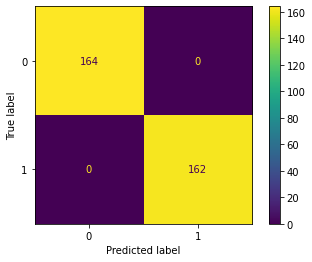

In [39]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classificador_estendido, X_test, y_test, values_format = '')

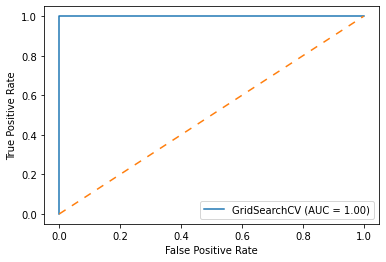

In [40]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classificador_estendido, X_test, y_test)
identity_line, = plt.plot([0,1],
                          [0,1])
identity_line.set_dashes([5, 5, 5, 5])